In [1]:
!pip install nltk

In [2]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import csv
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
df3 = pd.read_csv("reddit.csv")
df3

,comment_id,comment_parent_id,text
0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c..."
1,iztn0q0,t3_zj2aeu,I am so angry right now. I just wasted my time...
2,izudrph,t3_zj2aeu,chatgpt karma stupid is here folks! just when ...
3,iztfhtb,t3_zj2aeu,"Worked on me, not gonna lie"
4,izu2as9,t3_zj2aeu,"amazing moment for me, superb reflex"
...,...,...,...
994,j58d10g,t1_j572od2,"""do you know who I am?"""
995,j574mt2,t1_j572od2,I’ve been using it for the same amount of time...
996,j5n91vg,t1_j5lr9ol,He is literally the best i love him
997,j5h8nxn,t1_j5h0hmj,Yeah it is? Lol


In [5]:
columns_to_remove = ['comment_id','comment_parent_id']

df3.drop(columns=columns_to_remove, inplace=True)
df3

,text
0,"I've been shocked for days now, I don't need c..."
1,I am so angry right now. I just wasted my time...
2,chatgpt karma stupid is here folks! just when ...
3,"Worked on me, not gonna lie"
4,"amazing moment for me, superb reflex"
...,...
994,"""do you know who I am?"""
995,I’ve been using it for the same amount of time...
996,He is literally the best i love him
997,Yeah it is? Lol


In [6]:
df2 = pd.read_csv("youtube.csv")
df2

,CommentId,VideoId,text
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h..."
...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist


In [7]:
columns_to_remove = ['CommentId', 'VideoId']

df2.drop(columns=columns_to_remove, inplace=True)
df2

,text
0,If only people would just take a step back and...
1,Law enforcement is not trained to shoot to app...
2,\nDont you reckon them 'black lives matter' ba...
3,There are a very large number of people who do...
4,"The Arab dude is absolutely right, he should h..."
...,...
995,I remember that they sent in the national defe...
996,Stats don`t represent the problem. Race baitin...
997,The quote from the mother... Wow that hit hard...
998,this video is so racist


In [9]:
df1 = pd.read_csv("twitter.csv")
df1

,textID,text
0,cb774db0d1,"I have responded, if I were going"
1,549e992a42,That is really sad my friend
2,088c60f138,bullying me on the internet fair enough
3,9642c003ef,leave me alone you toxic stupid people
4,358bd9e861,you all have a special place in hell
...,...,...
1005,de1f8970e0,going to the mall this morning
1006,07d9362105,I`m either always on the train or at work
1007,093021fd94,I am really happy for you
1008,181de1d263,that is very sad and tragic


In [10]:
columns_to_remove = ['textID']

df1.drop(columns=columns_to_remove, inplace=True)
df1

,text
0,"I have responded, if I were going"
1,That is really sad my friend
2,bullying me on the internet fair enough
3,leave me alone you toxic stupid people
4,you all have a special place in hell
...,...
1005,going to the mall this morning
1006,I`m either always on the train or at work
1007,I am really happy for you
1008,that is very sad and tragic


In [11]:
df1 = df1.drop_duplicates()
df1

,text
0,"I have responded, if I were going"
1,That is really sad my friend
2,bullying me on the internet fair enough
3,leave me alone you toxic stupid people
4,you all have a special place in hell
...,...
1005,going to the mall this morning
1006,I`m either always on the train or at work
1007,I am really happy for you
1008,that is very sad and tragic


In [12]:
df3 = df3.drop_duplicates()
df3

,text
0,"I've been shocked for days now, I don't need c..."
1,I am so angry right now. I just wasted my time...
2,chatgpt karma stupid is here folks! just when ...
3,"Worked on me, not gonna lie"
4,"amazing moment for me, superb reflex"
...,...
994,"""do you know who I am?"""
995,I’ve been using it for the same amount of time...
996,He is literally the best i love him
997,Yeah it is? Lol


In [13]:
df1 = df1.dropna()
df1

,text
0,"I have responded, if I were going"
1,That is really sad my friend
2,bullying me on the internet fair enough
3,leave me alone you toxic stupid people
4,you all have a special place in hell
...,...
1005,going to the mall this morning
1006,I`m either always on the train or at work
1007,I am really happy for you
1008,that is very sad and tragic


In [14]:
df3 = df3.dropna()
df3

,text
0,"I've been shocked for days now, I don't need c..."
1,I am so angry right now. I just wasted my time...
2,chatgpt karma stupid is here folks! just when ...
3,"Worked on me, not gonna lie"
4,"amazing moment for me, superb reflex"
...,...
994,"""do you know who I am?"""
995,I’ve been using it for the same amount of time...
996,He is literally the best i love him
997,Yeah it is? Lol


In [15]:
df2 = df2.dropna()
df2

,text
0,If only people would just take a step back and...
1,Law enforcement is not trained to shoot to app...
2,\nDont you reckon them 'black lives matter' ba...
3,There are a very large number of people who do...
4,"The Arab dude is absolutely right, he should h..."
...,...
995,I remember that they sent in the national defe...
996,Stats don`t represent the problem. Race baitin...
997,The quote from the mother... Wow that hit hard...
998,this video is so racist


In [150]:
merged_df = pd.concat([df3, df1, df2], axis=0)

merged_df.reset_index(drop=True, inplace=True)

merged_df.to_csv('emotion_detection.csv', index=False)

In [20]:
df4 = pd.read_csv("Positive and Negative Word List.csv")
df4

,Unnamed: 0,Negative Sense Word List,Positive Sense Word List
0,0,NaN,NaN
1,1,abnormal,able
2,2,abolish,abundance
3,3,abominable,accelerate
4,4,abominably,accept
...,...,...,...
4716,4716,zenana,NaN
4717,4717,zephyr,NaN
4718,4718,zero,NaN
4719,4719,zol,NaN


In [21]:
columns_to_remove = ['Unnamed: 0']

df4.drop(columns=columns_to_remove, inplace=True)
df4

,Negative Sense Word List,Positive Sense Word List
0,NaN,NaN
1,abnormal,able
2,abolish,abundance
3,abominable,accelerate
4,abominably,accept
...,...,...
4716,zenana,NaN
4717,zephyr,NaN
4718,zero,NaN
4719,zol,NaN


In [22]:
df4 = df4.drop_duplicates()
df4

,Negative Sense Word List,Positive Sense Word List
0,NaN,NaN
1,abnormal,able
2,abolish,abundance
3,abominable,accelerate
4,abominably,accept
...,...,...
4716,zenana,NaN
4717,zephyr,NaN
4718,zero,NaN
4719,zol,NaN


In [23]:
df4 = df4.dropna()
df4

,Negative Sense Word List,Positive Sense Word List
1,abnormal,able
2,abolish,abundance
3,abominable,accelerate
4,abominably,accept
5,abominate,acclaim
...,...,...
4692,wrongful,zoom
4693,wrongly,zorbing
4694,wrought,zouk
4695,xanthoma,zounds


In [24]:
ignored_words = {'chatGPT', 'chatbots', 'config', 'reddit', 'twitter', 'youtube', 'bot', 'chatgpt', 'https', 'facebook', 'tik tok', 'tiktok', 'lmao', 'hmm', 'scifi', 'badass', 'google', 'chatbot', 'btw', 'meta', 'subreddit', 'haha', 'gpt', 'influencer', 'upvotes', 'upvote'}

# DATA PREPROCESSING OF TEXT

In [151]:
df = pd.read_csv("emotion_detection.csv")
df

,text
0,"I've been shocked for days now, I don't need c..."
1,I am so angry right now. I just wasted my time...
2,chatgpt karma stupid is here folks! just when ...
3,"Worked on me, not gonna lie"
4,"amazing moment for me, superb reflex"
...,...
2905,I remember that they sent in the national defe...
2906,Stats don`t represent the problem. Race baitin...
2907,The quote from the mother... Wow that hit hard...
2908,this video is so racist


In [152]:
df.head()

,text
0,"I've been shocked for days now, I don't need c..."
1,I am so angry right now. I just wasted my time...
2,chatgpt karma stupid is here folks! just when ...
3,"Worked on me, not gonna lie"
4,"amazing moment for me, superb reflex"


In [153]:
df['text']

0       I've been shocked for days now, I don't need c...
1       I am so angry right now. I just wasted my time...
2       chatgpt karma stupid is here folks! just when ...
3                             Worked on me, not gonna lie
4                    amazing moment for me, superb reflex
                              ...                        
2905    I remember that they sent in the national defe...
2906    Stats don`t represent the problem. Race baitin...
2907    The quote from the mother... Wow that hit hard...
2908                              this video is so racist
2909        God, the narrator has such an annoying lisp. 
Name: text, Length: 2910, dtype: object

In [154]:
def clean_text(text):
    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove extra whitespaces
    text = ' '.join(text.split())

    return text

df['text'] = df['text'].apply(clean_text)
print(df['text'])

0       I've been shocked for days now, I don't need c...
1       I am so angry right now. I just wasted my time...
2       chatgpt karma stupid is here folks! just when ...
3                             Worked on me, not gonna lie
4                    amazing moment for me, superb reflex
                              ...                        
2905    I remember that they sent in the national defe...
2906    Stats don`t represent the problem. Race baitin...
2907    The quote from the mother... Wow that hit hard...
2908                              this video is so racist
2909         God, the narrator has such an annoying lisp.
Name: text, Length: 2910, dtype: object


<ipython-input-154-f35b875e051f>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-154-f35b875e051f>:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [156]:
# Remove emojis
def remove_emojis(text):
    # Define a regular expression pattern for emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emojis in the first Unicode plane
        u"\U0001F300-\U0001F5FF"  # Emojis in the second Unicode plane
        u"\U0001F680-\U0001F6FF"  # Emojis in the third Unicode plane
        u"\U0001F700-\U0001F77F"  # Emojis in the fourth Unicode plane
        "]+", flags=re.UNICODE)

    # Use the sub method to remove emojis from the text
    text_no_emojis = emoji_pattern.sub(r'', text)

    return text_no_emojis

df['text'] = df['text'].apply(remove_emojis)
print(df['text'])

0       I've been shocked for days now, I don't need c...
1       I am so angry right now. I just wasted my time...
2       chatgpt karma stupid is here folks! just when ...
3                             Worked on me, not gonna lie
4                    amazing moment for me, superb reflex
                              ...                        
2905    I remember that they sent in the national defe...
2906    Stats don`t represent the problem. Race baitin...
2907    The quote from the mother... Wow that hit hard...
2908                              this video is so racist
2909         God, the narrator has such an annoying lisp.
Name: text, Length: 2910, dtype: object


In [157]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply stop word removal to the cleaned text
df['text'] = df['text'].apply(remove_stop_words)
print(df['text'])

0                   I've shocked days now, need clickbait
1            angry right now. wasted time reading garbage
2       chatgpt karma stupid folks! think stream thoug...
3                                    Worked me, gonna lie
4                        amazing moment me, superb reflex
                              ...                        
2905                       remember sent national defence
2906    Stats don`t represent problem. Race baiting at...
2907              quote mother... Wow hit hard. accurate.
2908                                         video racist
2909                         God, narrator annoying lisp.
Name: text, Length: 2910, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# SPELLING CHECKER

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

spell = SpellChecker()

def spell_check_text(text, ignored_words=None):
    if ignored_words is None:
        ignored_words = set()
    words = nltk.word_tokenize(text)
    original_words = []
    corrected_words = []
    punctuation = set(string.punctuation)
    for word in words:
        if word not in ignored_words and word[0].islower() and all(char not in punctuation for char in word) and not any(char.isdigit() for char in word):
            corrected_word = spell.correction(word)
            if corrected_word is not None and word.lower() != corrected_word.lower():
                original_words.append(word)
                corrected_words.append(corrected_word)
    corrected_text = ' '.join(corrected_words)
    if original_words:
        print("Original words:", original_words)
        print("Corrected words:", corrected_words)
    return corrected_text

df = df.applymap(lambda x: spell_check_text(x, ignored_words))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FAST\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\FAST\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Original words: ['couldn']
Corrected words: ['could']
Original words: ['gon', 'na']
Corrected words: ['on', 'a']
Original words: ['damnit']
Corrected words: ['dammit']
Original words: ['lie…']
Corrected words: ['lie']
Original words: ['customizable']
Corrected words: ['customable']
Original words: ['gon', 'na']
Corrected words: ['on', 'a']
Original words: ['humour']
Corrected words: ['humor']
Original words: ['ig']
Corrected words: ['i']
Original words: ['gen']
Corrected words: ['get']
Original words: ['idek']
Corrected words: ['idea']
Original words: ['ve', 'ascii']
Corrected words: ['we', 'asci']
Original words: ['today…']
Corrected words: ['today']
Original words: ['ca']
Corrected words: ['a']
Original words: ['fookin']
Corrected words: ['looking']
Original words: ['lol']
Corrected words: ['lot']
Original words: ['vid']
Corrected words: ['did']
Original words: ['didn', 'realise']
Corrected words: ['did', 'realize']
Original words: ['bs']
Corrected words: ['is']
Original words: ['gon

**Emotion Detection**

In [158]:
positive_words = set(df4['Positive Sense Word List'])
negative_words = set(df4['Negative Sense Word List'])

def detect_emotion(text):
    if isinstance(text, str):
        text = text.lower()
        positive_count = sum(1 for word in text.split() if word in positive_words)
        negative_count = sum(1 for word in text.split() if word in negative_words)

        if positive_count > negative_count:
            return 'positive'
        elif negative_count > positive_count:
            return 'negative'
        else:
            return 'neutral'

df['emotion'] = df['text'].apply(detect_emotion)

df['emotion']

0        neutral
1       negative
2       negative
3        neutral
4       positive
          ...   
2905     neutral
2906    positive
2907    positive
2908    negative
2909    negative
Name: emotion, Length: 2910, dtype: object

In [159]:
df['emotion'].value_counts()

emotion
positive    1718
neutral      820
negative     372
Name: count, dtype: int64

In [160]:
df

,text,emotion
0,"I've shocked days now, need clickbait",neutral
1,angry right now. wasted time reading garbage,negative
2,chatgpt karma stupid folks! think stream thoug...,negative
3,"Worked me, gonna lie",neutral
4,"amazing moment me, superb reflex",positive
...,...,...
2905,remember sent national defence,neutral
2906,Stats don`t represent problem. Race baiting at...,positive
2907,quote mother... Wow hit hard. accurate.,positive
2908,video racist,negative


In [161]:
df[df['emotion'] == 'positive']

,text,emotion
4,"amazing moment me, superb reflex",positive
8,What's point even trying click-bait Reddit? Yo...,positive
9,love you.,positive
10,thread amazing,positive
11,"asked opposite that: ""A title would likely gen...",positive
...,...,...
2900,"Remember..Michael Brown young, teen boy, happe...",positive
2901,"point trying make? blacks ""Equal Opportunity"" ...",positive
2903,"Whites move-out Ferguson, let's see nice becom...",positive
2906,Stats don`t represent problem. Race baiting at...,positive


In [162]:
df[df['emotion'] == 'negative']

,text,emotion
1,angry right now. wasted time reading garbage,negative
2,chatgpt karma stupid folks! think stream thoug...,negative
5,People Reddit Suck,negative
22,worst thing ever,negative
23,thing sucks hate,negative
...,...,...
2882,see bunch ignorant fucks trying hardest turn r...,negative
2892,Staged event... fake riots..divid conquer........,negative
2902,lot disgusting people comments trying rational...,negative
2908,video racist,negative


In [163]:
df[df['emotion'] == 'neutral']

,text,emotion
0,"I've shocked days now, need clickbait",neutral
3,"Worked me, gonna lie",neutral
6,sick tired ChatGPT ability generate fake title...,neutral
7,Inception)),neutral
15,Shit worked,neutral
...,...,...
2887,"11:21 LMAO ""I agree rioting violent protesting...",neutral
2898,much hatred people....,neutral
2899,Dats tuff,neutral
2904,found channel one favs already. ..thank u vids...,neutral


**Feature extraction**

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the email text to TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(df['text'])
print(tfidf_vectors)

  (0, 1443)	0.4731392003005293
  (0, 4935)	0.3057630637483294
  (0, 5032)	0.349746350083348
  (0, 1976)	0.4053968434989801
  (0, 6535)	0.5222808656001338
  (0, 7774)	0.3510011870330715
  (1, 3139)	0.40568617481892344
  (1, 5927)	0.4192508695800916
  (1, 7373)	0.26103571645034135
  (1, 7910)	0.5035224505734454
  (1, 6182)	0.2688321815640718
  (1, 500)	0.4192508695800916
  (1, 5032)	0.29988480944311807
  (2, 3095)	0.2630042188028795
  (2, 3196)	0.1728924960950986
  (2, 1774)	0.3220619277792802
  (2, 3175)	0.3555122515965035
  (2, 1130)	0.27981301791184565
  (2, 7322)	0.27412897158895816
  (2, 6974)	0.3801639893635154
  (2, 7307)	0.20017375828792236
  (2, 2978)	0.32714648047623685
  (2, 7008)	0.2453676358253892
  (2, 4113)	0.3555122515965035
  (2, 1322)	0.19791122130586
  :	:
  (2906, 5845)	0.1546293740300523
  (2906, 4281)	0.18569727826041252
  (2906, 5671)	0.16562092979119097
  (2906, 6585)	0.21337275797772662
  (2906, 6086)	0.20362715983914828
  (2906, 7412)	0.17180690036402155
  (2906

In [165]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the email text to BoW representations
bow_vectors = count_vectorizer.fit_transform(df['text'])
print(bow_vectors)

  (0, 7774)	1
  (0, 6535)	1
  (0, 1976)	1
  (0, 5032)	1
  (0, 4935)	1
  (0, 1443)	1
  (1, 5032)	1
  (1, 500)	1
  (1, 6182)	1
  (1, 7910)	1
  (1, 7373)	1
  (1, 5927)	1
  (1, 3139)	1
  (2, 1322)	1
  (2, 4113)	1
  (2, 7008)	1
  (2, 2978)	1
  (2, 7307)	1
  (2, 6974)	1
  (2, 7322)	1
  (2, 1130)	1
  (2, 3175)	1
  (2, 1774)	1
  (2, 3196)	1
  (2, 3095)	1
  :	:
  (2906, 5845)	1
  (2906, 891)	1
  (2906, 1845)	1
  (2906, 3861)	1
  (2906, 1047)	1
  (2906, 7471)	1
  (2906, 759)	1
  (2906, 6911)	1
  (2906, 8031)	1
  (2906, 2062)	1
  (2906, 677)	1
  (2906, 5111)	1
  (2906, 4353)	1
  (2907, 280)	1
  (2907, 8117)	1
  (2907, 3432)	1
  (2907, 3549)	1
  (2907, 4820)	1
  (2907, 5843)	1
  (2908, 7808)	1
  (2908, 5853)	1
  (2909, 3242)	1
  (2909, 509)	1
  (2909, 4353)	1
  (2909, 4910)	1


**Machine Learning Models**

In [166]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotion'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

le = LabelEncoder()
y_train_num = le.fit_transform(y_train)
y_test_num = le.transform(y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_vec)
lr_accuracy = accuracy_score(y_test, y_pred)

# Evaluate the performance of the model
print("Accuracy:", lr_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.695
Classification Report:
               precision    recall  f1-score   support

    negative       0.47      0.24      0.32        29
     neutral       0.70      0.92      0.80       124
    positive       0.78      0.38      0.51        47

    accuracy                           0.69       200
   macro avg       0.65      0.51      0.54       200
weighted avg       0.69      0.69      0.66       200



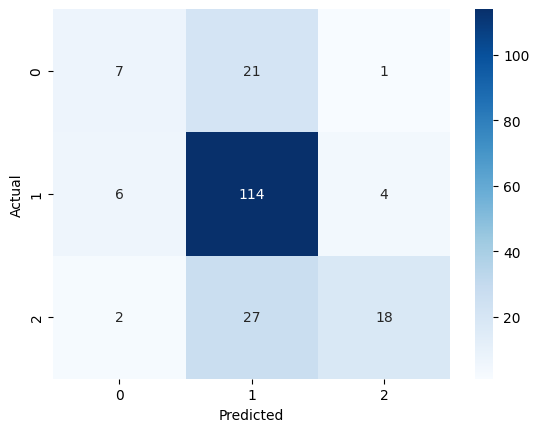

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.svm import SVC


# Train a SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred  = svm_model.predict(X_test_vec)
svm_accuracy = accuracy_score(y_test, y_pred)


# Evaluate the performance of the model
print("Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.52      0.55        29
     neutral       0.79      0.88      0.83       124
    positive       0.78      0.60      0.67        47

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.76      0.76      0.75       200



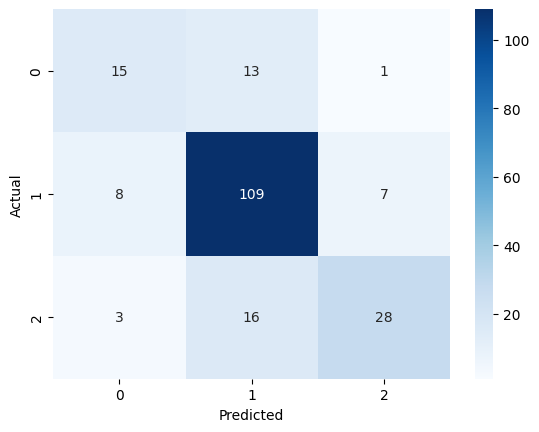

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000, random_state=42)
model_rf.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(X_test_vec)
rf_accuracy = accuracy_score(y_test, y_pred)

# Evaluate the performance of the model
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.38      0.52        29
     neutral       0.79      0.93      0.86       124
    positive       0.81      0.72      0.76        47

    accuracy                           0.80       200
   macro avg       0.82      0.68      0.71       200
weighted avg       0.80      0.80      0.79       200



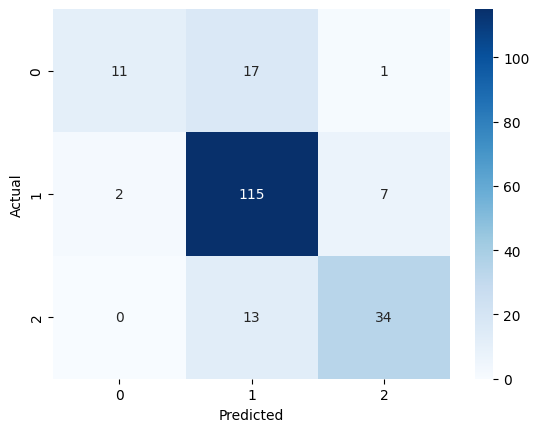

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)

y_pred = model_nb.predict(X_test_vec)
mlb_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", mlb_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

    negative       0.56      0.31      0.40        29
     neutral       0.71      0.83      0.77       124
    positive       0.56      0.47      0.51        47

    accuracy                           0.67       200
   macro avg       0.61      0.54      0.56       200
weighted avg       0.65      0.67      0.65       200



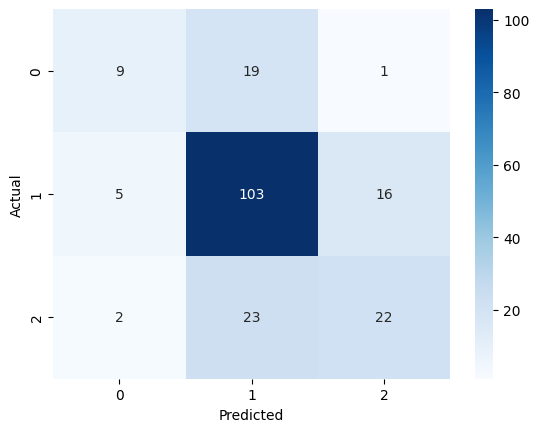

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**ANN**

In [ ]:
ann_model = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, batch_size=64, learning_rate='constant', learning_rate_init=0.01)
ann_model.fit(X_train_vec, y_train)

y_pred = ann_model.predict(X_test_vec)
print("Accuracy:", ann_model.score(X_test_vec, y_test))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.69

Classification Report:

              precision    recall  f1-score   support

    negative       0.58      0.52      0.55        29
     neutral       0.74      0.81      0.77       124
    positive       0.59      0.47      0.52        47

    accuracy                           0.69       200
   macro avg       0.64      0.60      0.61       200
weighted avg       0.68      0.69      0.68       200



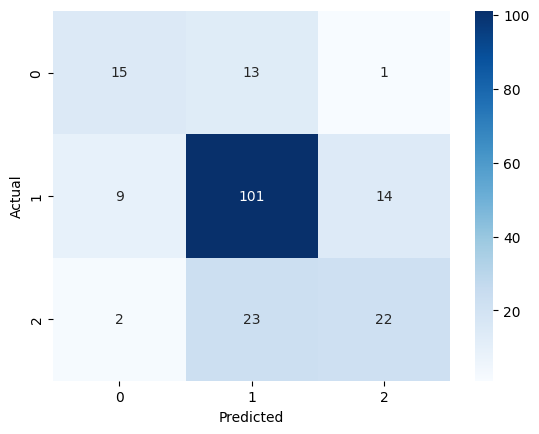

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
ann_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=1000, batch_size=64, learning_rate='constant', learning_rate_init=0.01)
ann_model.fit(X_train_vec, y_train)

y_pred = ann_model.predict(X_test_vec)
print("Accuracy:", ann_model.score(X_test_vec, y_test))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.715

Classification Report:

              precision    recall  f1-score   support

    negative       0.52      0.45      0.48        29
     neutral       0.76      0.85      0.80       124
    positive       0.69      0.53      0.60        47

    accuracy                           0.71       200
   macro avg       0.66      0.61      0.63       200
weighted avg       0.71      0.71      0.71       200



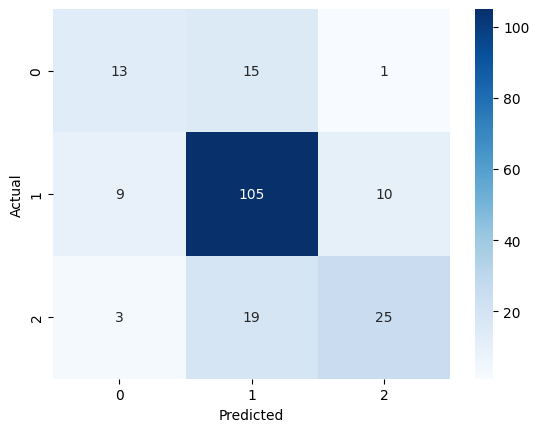

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
ann_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=1000, batch_size=32, learning_rate='constant', learning_rate_init=0.01)
ann_model.fit(X_train_vec, y_train)

y_pred = ann_model.predict(X_test_vec)
print("Accuracy:", ann_model.score(X_test_vec, y_test))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.72

Classification Report:

              precision    recall  f1-score   support

    negative       0.61      0.48      0.54        29
     neutral       0.77      0.81      0.79       124
    positive       0.64      0.62      0.63        47

    accuracy                           0.72       200
   macro avg       0.67      0.64      0.65       200
weighted avg       0.71      0.72      0.72       200



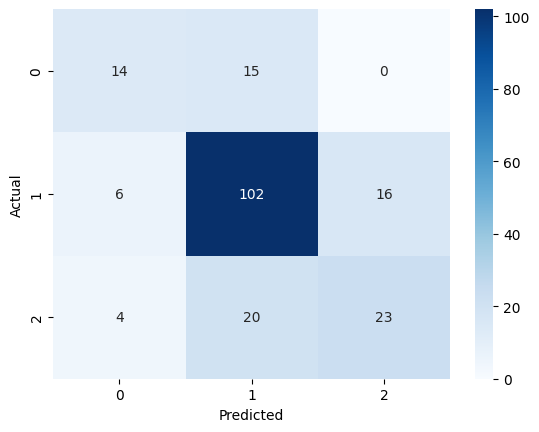

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(128, 64), (256, 128), (512, 256)],
    'max_iter': [50, 100, 200],
    'learning_rate_init': [0.1, 0.1, 0.1]
}
mlp = MLPClassifier(random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_vec, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.1, 'max_iter': 50}
Best score: 0.690125786163522


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
!pip install keras

**RNN**

In [170]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences)

# Encode labels
label_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
y = df['emotion'].map(label_dict)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

from sklearn.metrics import accuracy_score, classification_report

# Build RNN model with 64 units
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X.shape[1]))
model.add(SimpleRNN(64))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
y_pred = model.predict(X).argmax(axis=1)
print(classification_report(y, y_pred))

Epoch 1/10
25/25 [==============================] - 8s 208ms/step - loss: 0.8860 - accuracy: 0.6123 - val_loss: 0.9384 - val_accuracy: 0.5650
Epoch 2/10
25/25 [==============================] - 6s 238ms/step - loss: 0.6630 - accuracy: 0.7528 - val_loss: 0.9256 - val_accuracy: 0.5800
Epoch 3/10
25/25 [==============================] - 7s 292ms/step - loss: 0.4893 - accuracy: 0.8407 - val_loss: 0.9457 - val_accuracy: 0.5400
Epoch 4/10
25/25 [==============================] - 5s 208ms/step - loss: 0.3392 - accuracy: 0.8846 - val_loss: 0.9744 - val_accuracy: 0.5550
Epoch 5/10
25/25 [==============================] - 3s 122ms/step - loss: 0.4094 - accuracy: 0.8519 - val_loss: 1.5780 - val_accuracy: 0.2600
Epoch 6/10
25/25 [==============================] - 3s 114ms/step - loss: 0.4046 - accuracy: 0.8708 - val_loss: 0.9941 - val_accuracy: 0.5750
Epoch 7/10
25/25 [==============================] - 3s 130ms/step - loss: 0.2063 - accuracy: 0.9498 - val_loss: 1.0002 - val_accuracy: 0.5550
Epoch 

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import Dropout

# Build RNN model with 64 units
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X.shape[1]))
model.add(SimpleRNN(64))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
y_pred = model.predict(X).argmax(axis=1)
print(classification_report(y, y_pred))

Epoch 1/10
73/73 [==============================] - 15s 163ms/step - loss: 0.9640 - accuracy: 0.5395 - val_loss: 0.9098 - val_accuracy: 0.6117
Epoch 2/10
73/73 [==============================] - 11s 152ms/step - loss: 0.6741 - accuracy: 0.7156 - val_loss: 0.9062 - val_accuracy: 0.6014
Epoch 3/10
73/73 [==============================] - 11s 146ms/step - loss: 0.3785 - accuracy: 0.8866 - val_loss: 0.9071 - val_accuracy: 0.6134
Epoch 4/10
73/73 [==============================] - 8s 115ms/step - loss: 0.1867 - accuracy: 0.9489 - val_loss: 0.9396 - val_accuracy: 0.6254
Epoch 5/10
73/73 [==============================] - 10s 139ms/step - loss: 0.1006 - accuracy: 0.9802 - val_loss: 1.0157 - val_accuracy: 0.6409
Epoch 6/10
73/73 [==============================] - 10s 136ms/step - loss: 0.0660 - accuracy: 0.9824 - val_loss: 1.0629 - val_accuracy: 0.6134
Epoch 7/10
73/73 [==============================] - 8s 115ms/step - loss: 0.0480 - accuracy: 0.9863 - val_loss: 1.1386 - val_accuracy: 0.6254
E

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import Dropout

# Build RNN model with 64 units
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X.shape[1]))
model.add(SimpleRNN(64))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
y_pred = model.predict(X).argmax(axis=1)
print(classification_report(y, y_pred))

Epoch 1/10
25/25 [==============================] - 10s 224ms/step - loss: 0.9570 - accuracy: 0.5521 - val_loss: 0.9339 - val_accuracy: 0.5900
Epoch 2/10
25/25 [==============================] - 3s 125ms/step - loss: 0.7995 - accuracy: 0.6374 - val_loss: 0.9387 - val_accuracy: 0.6150
Epoch 3/10
25/25 [==============================] - 5s 198ms/step - loss: 0.6337 - accuracy: 0.7691 - val_loss: 0.9636 - val_accuracy: 0.5750
Epoch 4/10
25/25 [==============================] - 3s 126ms/step - loss: 0.4579 - accuracy: 0.8595 - val_loss: 0.9453 - val_accuracy: 0.6300
Epoch 5/10
25/25 [==============================] - 3s 127ms/step - loss: 0.3249 - accuracy: 0.9009 - val_loss: 0.9399 - val_accuracy: 0.6000
Epoch 6/10
25/25 [==============================] - 3s 121ms/step - loss: 0.2170 - accuracy: 0.9573 - val_loss: 0.9676 - val_accuracy: 0.6000
Epoch 7/10
25/25 [==============================] - 5s 217ms/step - loss: 0.1474 - accuracy: 0.9724 - val_loss: 0.9641 - val_accuracy: 0.6200
Epoch

In [ ]:
# Adjusted the units to 128 for more complexity

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X.shape[1]))
model.add(SimpleRNN(128))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
y_pred = model.predict(X).argmax(axis=1)
print(classification_report(y, y_pred))

Epoch 1/10
25/25 [==============================] - 10s 297ms/step - loss: 0.8539 - accuracy: 0.6575 - val_loss: 0.9763 - val_accuracy: 0.5800
Epoch 2/10
25/25 [==============================] - 5s 191ms/step - loss: 0.6746 - accuracy: 0.7654 - val_loss: 0.9453 - val_accuracy: 0.5600
Epoch 3/10
25/25 [==============================] - 4s 160ms/step - loss: 0.7484 - accuracy: 0.7064 - val_loss: 1.0850 - val_accuracy: 0.3850
Epoch 4/10
25/25 [==============================] - 5s 197ms/step - loss: 0.6314 - accuracy: 0.7177 - val_loss: 0.9202 - val_accuracy: 0.5800
Epoch 5/10
25/25 [==============================] - 4s 158ms/step - loss: 0.5158 - accuracy: 0.8243 - val_loss: 0.9186 - val_accuracy: 0.5750
Epoch 6/10
25/25 [==============================] - 4s 177ms/step - loss: 0.4034 - accuracy: 0.8770 - val_loss: 0.9086 - val_accuracy: 0.5950
Epoch 7/10
25/25 [==============================] - 6s 225ms/step - loss: 0.3027 - accuracy: 0.9046 - val_loss: 0.9108 - val_accuracy: 0.5700
Epoch

In [ ]:
# LSTM layer with 64 units

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X.shape[1]))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=10, validation_split=0.2)

loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy:.2f}")

y_pred = model.predict(X).argmax(axis=1)
print(classification_report(y, y_pred))

Epoch 1/10
25/25 [==============================] - 21s 688ms/step - loss: 0.8969 - accuracy: 0.6650 - val_loss: 0.9304 - val_accuracy: 0.5800
Epoch 2/10
25/25 [==============================] - 10s 390ms/step - loss: 0.7670 - accuracy: 0.6775 - val_loss: 0.9200 - val_accuracy: 0.5800
Epoch 3/10
25/25 [==============================] - 12s 471ms/step - loss: 0.6933 - accuracy: 0.7240 - val_loss: 0.9218 - val_accuracy: 0.5900
Epoch 4/10
25/25 [==============================] - 7s 287ms/step - loss: 0.5242 - accuracy: 0.8118 - val_loss: 0.9332 - val_accuracy: 0.5800
Epoch 5/10
25/25 [==============================] - 8s 308ms/step - loss: 0.3025 - accuracy: 0.8858 - val_loss: 1.0411 - val_accuracy: 0.5600
Epoch 6/10
25/25 [==============================] - 8s 314ms/step - loss: 0.1805 - accuracy: 0.9498 - val_loss: 1.1367 - val_accuracy: 0.5500
Epoch 7/10
25/25 [==============================] - 7s 271ms/step - loss: 0.1071 - accuracy: 0.9849 - val_loss: 1.3683 - val_accuracy: 0.5400
Epo

In [ ]:
# LSTM layer with 128 units

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X.shape[1]))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=10, validation_split=0.2)

loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy:.2f}")

# Classification report for LSTM model
y_pred = model.predict(X).argmax(axis=1)
print(classification_report(y, y_pred))

Epoch 1/10
25/25 [==============================] - 21s 709ms/step - loss: 0.9248 - accuracy: 0.6637 - val_loss: 0.9326 - val_accuracy: 0.5800
Epoch 2/10
25/25 [==============================] - 24s 955ms/step - loss: 0.7703 - accuracy: 0.6775 - val_loss: 0.9287 - val_accuracy: 0.5800
Epoch 3/10
25/25 [==============================] - 29s 1s/step - loss: 0.6934 - accuracy: 0.7302 - val_loss: 0.9073 - val_accuracy: 0.6000
Epoch 4/10
25/25 [==============================] - 26s 1s/step - loss: 0.5201 - accuracy: 0.8231 - val_loss: 0.9263 - val_accuracy: 0.5650
Epoch 5/10
25/25 [==============================] - 28s 1s/step - loss: 0.2830 - accuracy: 0.9109 - val_loss: 1.0900 - val_accuracy: 0.5550
Epoch 6/10
25/25 [==============================] - 16s 652ms/step - loss: 0.1327 - accuracy: 0.9586 - val_loss: 1.4013 - val_accuracy: 0.5100
Epoch 7/10
25/25 [==============================] - 20s 815ms/step - loss: 0.1627 - accuracy: 0.9661 - val_loss: 1.0822 - val_accuracy: 0.5250
Epoch 8/

GRAPH

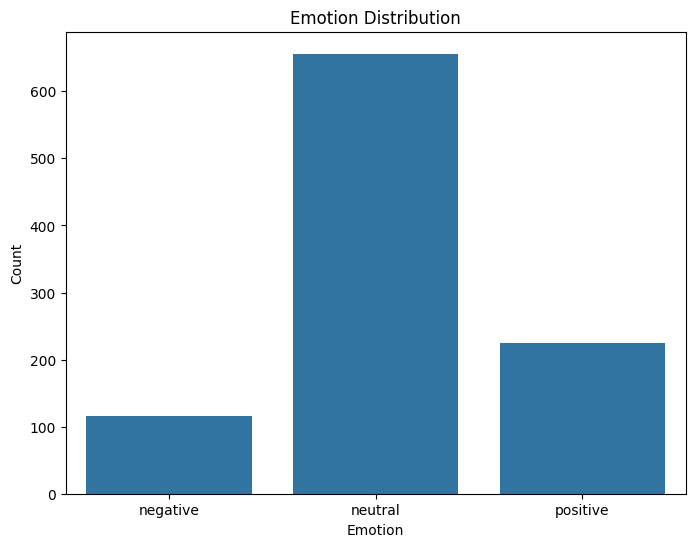

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='emotion', data=df)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')
plt.show()

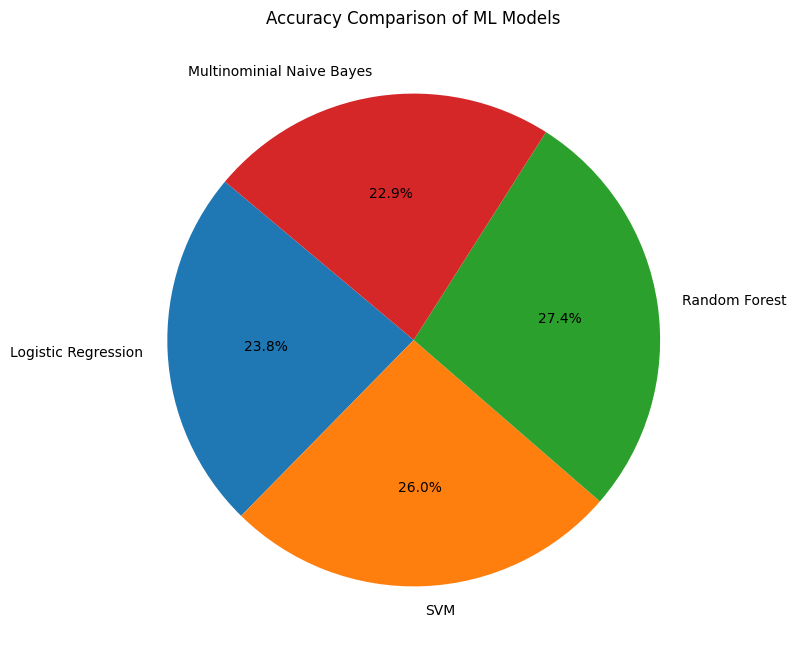

In [ ]:
model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'Multinominial Naive Bayes']
accuracies = [lr_accuracy, svm_accuracy, rf_accuracy, mlb_accuracy]

plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=model_names, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy Comparison of ML Models')
plt.show()

In [173]:
input_text = "Had a very bad day oday. There was a lot of traffic and my car broke which made me angry"

input_seq = tokenizer.texts_to_sequences([input_text])[0]

input_seq = pad_sequences([input_seq], maxlen=X.shape[1])

emotion_index = model.predict(input_seq).argmax(axis=1)[0]

emotion_labels = ['negative', 'neutral', 'positive']
emotion_label = emotion_labels[emotion_index]

print(f"The predicted emotion for '{input_text}' is {emotion_label}.")

1/1 [==============================] - 0s 30ms/step
The predicted emotion for 'Had a very bad day oday. There was a lot of traffic and my car broke which made me angry' is negative.


In [174]:
input_text = "Got accepted for a job interview. Feeling really happy"

input_seq = tokenizer.texts_to_sequences([input_text])[0]

input_seq = pad_sequences([input_seq], maxlen=X.shape[1])

emotion_index = model.predict(input_seq).argmax(axis=1)[0]

emotion_labels = ['negative', 'neutral', 'positive']
emotion_label = emotion_labels[emotion_index]

print(f"The predicted emotion for '{input_text}' is {emotion_label}.")

1/1 [==============================] - 0s 28ms/step
The predicted emotion for 'Got accepted for a job interview. Feeling really happy' is positive.


In [178]:
input_text =  "Nobody is present there"

input_seq = tokenizer.texts_to_sequences([input_text])[0]

input_seq = pad_sequences([input_seq], maxlen=X.shape[1])

emotion_index = model.predict(input_seq).argmax(axis=1)[0]

emotion_labels = ['negative', 'neutral', 'positive']
emotion_label = emotion_labels[emotion_index]

print(f"The predicted emotion for '{input_text}' is {emotion_label}.")

1/1 [==============================] - 0s 54ms/step
The predicted emotion for 'Nobody is present there' is neutral.
